In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

import pathlib
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [7]:
df_data = pd.read_csv("Salary_Dataset/Salary_Data.csv")
df_data.shape

(30, 2)

In [10]:
df_data

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [12]:
df_data.isna().sum() #결측 값 없음

YearsExperience    0
Salary             0
dtype: int64

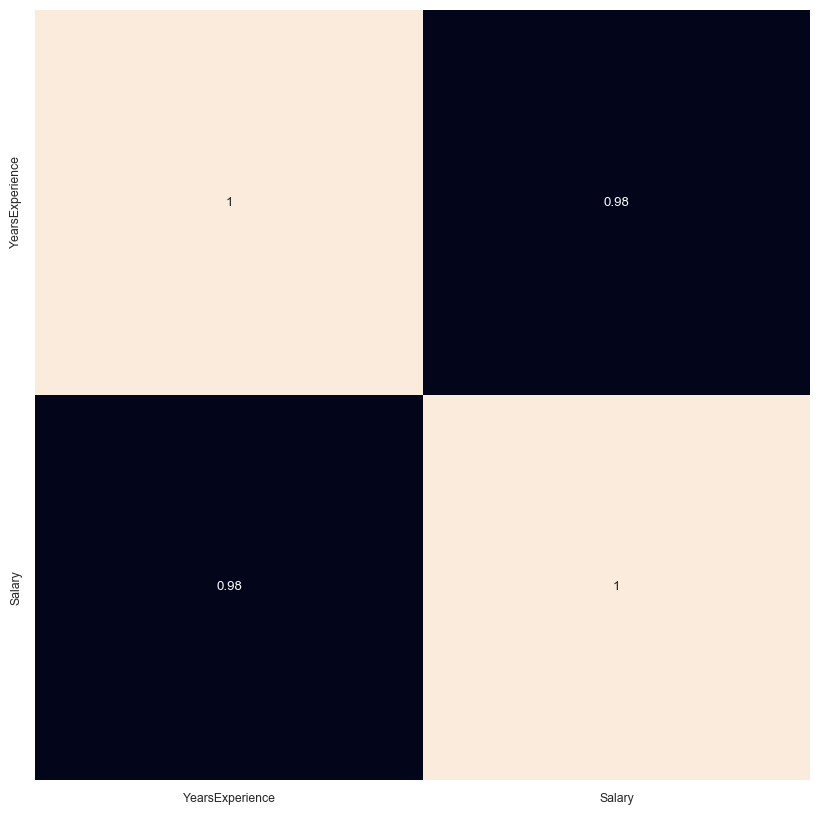

In [14]:
#상관관계 행렬, 데이터 셋에서 변수들이 어떤 식으로 연관 되었는지 확인
data_corr = df_data.corr()

#히트맵
plt.figure(figsize=(10,10))
sns.set(font_scale=0.8)
sns.heatmap(data_corr, annot=True, cbar=False) #annot:숫자, cbar:바 
plt.show()

#여기서 연관성이 큰 feature만 사용하면 효율 증진

In [43]:
#Set x and y values
y=df_data.YearsExperience.values
x_df=df_data.drop('YearsExperience',axis=1)
#normalization
x=(x_df-np.min(x_df))/(np.max(x_df)-np.min(x_df))

In [44]:
# train/test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=423)

In [45]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix

from sklearn.tree import DecisionTreeRegressor

clf_dt = DecisionTreeRegressor()
clf_dt.fit(X_train, y_train)

pred_dt = clf_dt.predict(X_test)

print(clf_dt.score(X_train, y_train))

1.0


In [46]:
mse = np.sqrt(mean_squared_error(pred_dt, y_test))
print('평균제곱근오차', mse)

평균제곱근오차 1.1944315244779282


In [47]:
from sklearn.ensemble import RandomForestRegressor

rf_clf = RandomForestRegressor()
rf_clf.fit(X_train, y_train)

pred_rf = rf_clf.predict(X_test)

print(rf_clf.score(X_train, y_train))

0.9899909363970444


In [48]:
mse = np.sqrt(mean_squared_error(pred_rf, y_test))
print('평균제곱근오차', mse)

평균제곱근오차 0.8709010659464483


In [49]:
from sklearn.linear_model import LinearRegression

clf_lr = LinearRegression()
clf_lr.fit(X_train, y_train)

pred_lr = clf_lr.predict(X_test)

print(clf_lr.score(X_train, y_train))

0.9649260169781166


In [50]:
mse = np.sqrt(mean_squared_error(pred_lr, y_test))
print('평균제곱근오차', mse)

평균제곱근오차 0.6320335490251936


In [51]:
from sklearn.svm import SVR

clf_svm = SVR()
clf_svm.fit(X_train, y_train)

pred_svm = clf_svm.predict(X_test)

print(clf_svm.score(X_train, y_train))

0.9419985796190757


In [52]:
mse = np.sqrt(mean_squared_error(pred_svm, y_test))
print('평균제곱근오차', mse)

평균제곱근오차 0.6100184255760016
